# 1. General Data Preparation

Tasks to perform:  

1.1. Filter songs in Global Market
1.2. Get relevant features  
1.3. Remove outliers, duplicates and missing values  
1.4. Relabel genres

In [19]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
songs_df = pd.read_csv('Data/spotify_global_0.csv')
global_songs_df = songs_df[songs_df.Country=='Global']
global_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5461 entries, 0 to 83880
Columns: 151 entries, Country to Cluster
dtypes: float64(58), int64(65), object(28)
memory usage: 6.3+ MB


In [21]:
# define columns to keep
keep_cols = [
 'Uri',
 'Popularity',
 'Title',
 'Artist',
 'Album/Single',
 'Genre',
 'Artist_followers',
 'Explicit',
 'Album',
 'Release_date',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acoustics',
 'instrumentalness',
 'liveliness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature',
 'Genre_new',
 'Days_since_release',
 'Top50_dummy']

In [22]:
# get only relevant columns
global_songs_df = global_songs_df[keep_cols]

# case normalize col names
global_songs_df.columns = map(str.lower, global_songs_df.columns)

# rename cols
renamed_cols_map = {col: col.split('_')[0] for col in keep_cols if 'norm2' in col}
renamed_cols_map.update({
    'acoustics': 'acousticness',
    'liveliness': 'liveness',
    'uri': 'song_id'
})

global_songs_df = global_songs_df.rename(columns=renamed_cols_map)
global_songs_df.columns

Index(['song_id', 'popularity', 'title', 'artist', 'album/single', 'genre',
       'artist_followers', 'explicit', 'album', 'release_date', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'genre_new', 'days_since_release', 'top50_dummy'],
      dtype='object')

In [23]:
# extract song_id from uri
global_songs_df['song_id'] = global_songs_df['song_id'].str.split('/').apply(lambda x:x[-1])
print(global_songs_df.song_id.head(1))

global_songs_df.info()

0    6FyRXC8tJUh863JCkyWqtk
Name: song_id, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5461 entries, 0 to 83880
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song_id             5461 non-null   object 
 1   popularity          5461 non-null   float64
 2   title               5461 non-null   object 
 3   artist              5461 non-null   object 
 4   album/single        5461 non-null   object 
 5   genre               5461 non-null   object 
 6   artist_followers    5460 non-null   object 
 7   explicit            5461 non-null   object 
 8   album               5461 non-null   object 
 9   release_date        5461 non-null   object 
 10  danceability        5461 non-null   object 
 11  energy              5461 non-null   object 
 12  key                 5461 non-null   object 
 13  loudness            5461 non-null   object 
 14  mode                5461 non-null   object 
 1

In [24]:
# omit missing values
global_songs_df = global_songs_df.dropna(subset=['artist_followers', 'days_since_release'])
global_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5394 entries, 0 to 83880
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song_id             5394 non-null   object 
 1   popularity          5394 non-null   float64
 2   title               5394 non-null   object 
 3   artist              5394 non-null   object 
 4   album/single        5394 non-null   object 
 5   genre               5394 non-null   object 
 6   artist_followers    5394 non-null   object 
 7   explicit            5394 non-null   object 
 8   album               5394 non-null   object 
 9   release_date        5394 non-null   object 
 10  danceability        5394 non-null   object 
 11  energy              5394 non-null   object 
 12  key                 5394 non-null   object 
 13  loudness            5394 non-null   object 
 14  mode                5394 non-null   object 
 15  speechiness         5394 non-null   object 
 16  acous

In [25]:
# type cast cols

# cast cols to numeric 
numeric_cols = ['artist_followers', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
global_songs_df[numeric_cols] = global_songs_df[numeric_cols].apply(pd.to_numeric)

# map explicit to 0/1
global_songs_df['explicit'] = np.where(global_songs_df['explicit']=='True', 1, 0)

# release date to date time
global_songs_df['release_date'] = pd.to_datetime(global_songs_df['release_date'])

# additional cols
global_songs_df = global_songs_df.astype({
    'title': 'str',
    'artist': 'str',
    'artist_followers': 'int64',
    'days_since_release': 'int64',
})
    
global_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5394 entries, 0 to 83880
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   song_id             5394 non-null   object        
 1   popularity          5394 non-null   float64       
 2   title               5394 non-null   object        
 3   artist              5394 non-null   object        
 4   album/single        5394 non-null   object        
 5   genre               5394 non-null   object        
 6   artist_followers    5394 non-null   int64         
 7   explicit            5394 non-null   int32         
 8   album               5394 non-null   object        
 9   release_date        5394 non-null   datetime64[ns]
 10  danceability        5394 non-null   float64       
 11  energy              5394 non-null   float64       
 12  key                 5394 non-null   int64         
 13  loudness            5394 non-null   float64    

In [26]:
# check for duplicates

duplicates_df = global_songs_df[global_songs_df.sort_values('popularity', ascending=False)\
                .duplicated(subset=['title', 'artist'], keep='last')]\
                .sort_values(by='title')

global_songs_df = global_songs_df[~global_songs_df['song_id'].isin(duplicates_df['song_id'])]
global_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4854 entries, 16 to 83880
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   song_id             4854 non-null   object        
 1   popularity          4854 non-null   float64       
 2   title               4854 non-null   object        
 3   artist              4854 non-null   object        
 4   album/single        4854 non-null   object        
 5   genre               4854 non-null   object        
 6   artist_followers    4854 non-null   int64         
 7   explicit            4854 non-null   int32         
 8   album               4854 non-null   object        
 9   release_date        4854 non-null   datetime64[ns]
 10  danceability        4854 non-null   float64       
 11  energy              4854 non-null   float64       
 12  key                 4854 non-null   int64         
 13  loudness            4854 non-null   float64   

<ipython-input-26-81075282ae62>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicates_df = global_songs_df[global_songs_df.sort_values('popularity', ascending=False)\


In [27]:
# explore genres

genre_count_df = global_songs_df.genre.value_counts().reset_index().rename(columns={'index':'genre', 'genre':'count'})
genre_count_df

genre  count
0              dance pop    779
1            atl hip hop    341
2                  latin    265
3                    pop    230
4                hip hop    210
..                   ...    ...
248  south african house      1
249              novelty      1
250       indie cafe pop      1
251             pop punk      1
252     chilean hardcore      1

[253 rows x 2 columns]

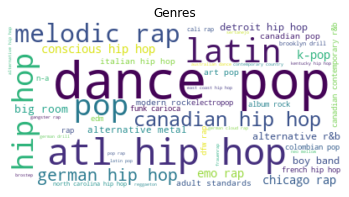

In [28]:
# wordcloud of genres

from wordcloud import WordCloud

def gen_wordcloud(data, title):
    wc = WordCloud(background_color="white", max_words=50).generate_from_frequencies(data)
    plt.title(title)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

d = {genre: count for genre, count in genre_count_df.values}

gen_wordcloud(d, 'Genres')

In [29]:
# explore genres

genre_count_df = global_songs_df.genre.value_counts() \
                            .reset_index().\
                            rename(columns={
                                'index':'genre',
                                'genre':'count'}
                                )
genre_count_df

genre  count
0              dance pop    779
1            atl hip hop    341
2                  latin    265
3                    pop    230
4                hip hop    210
..                   ...    ...
248  south african house      1
249              novelty      1
250       indie cafe pop      1
251             pop punk      1
252     chilean hardcore      1

[253 rows x 2 columns]

<AxesSubplot:title={'center':'Counts of songs by Genre (total=2451)'}, xlabel='genre', ylabel='count'>

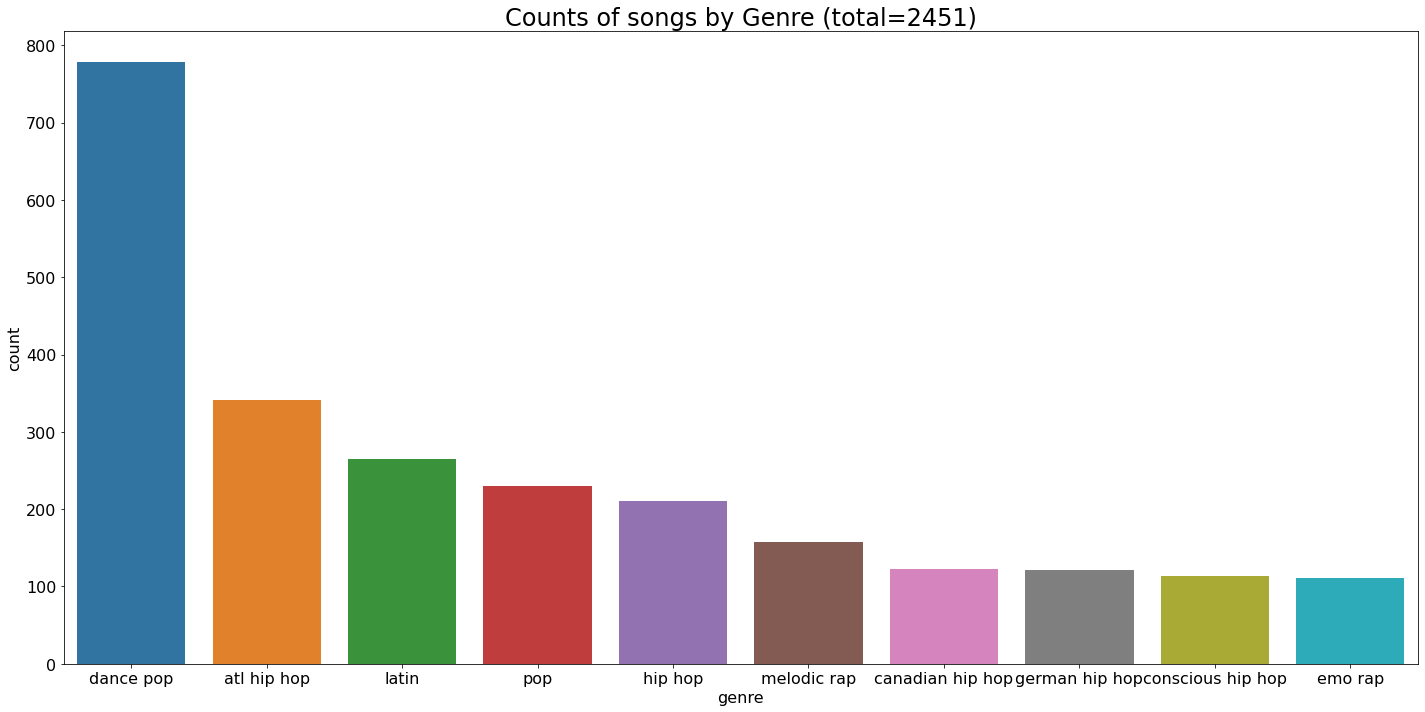

In [30]:
# genre count plot

genre_count_df = genre_count_df.sort_values('count', ascending=False).head(10)
plt.figure(figsize=(20, 10))
plt.title(f"Counts of songs by Genre (total={genre_count_df['count'].sum()})", fontsize=24)
plt.xlabel('genre', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
sns.barplot(x='genre', y='count', data=genre_count_df)

In [31]:
# remove songs without genre
remove_genres = ['n-a', 'else']
global_songs_df = global_songs_df[~global_songs_df['genre_new'].isin(remove_genres)]
global_songs_df.shape

(4761, 26)

In [32]:
# remap genres
og_genre_keywords = '|'.join(['chinese', 'mandopop', 'c-', 'canto', 'malay', 'kapak', 'dangdut'])

global_songs_df['genre_new'] = np.where(
    global_songs_df['genre'].str.contains(og_genre_keywords),
    global_songs_df['genre'], global_songs_df['genre_new'])

global_songs_df.genre_new.value_counts()

pop                 1448
hip hop             1313
rap                  625
latin                311
rock                 173
r&b/soul             166
dance/electronic     132
house                114
k-pop                113
boy band              74
metal                 73
indie                 62
trap                  54
funk                  53
country               26
reggaeton             23
bolero                 1
Name: genre_new, dtype: int64

In [33]:
# remap c-pop

chinese_pop_keywords = '|'.join(['chinese pop', 'chinese viral pop', 'c-pop', 'mandopop', 'cantopop', 'chinese'])

global_songs_df['genre_new'] = np.where(
    global_songs_df['genre_new'].str.contains(chinese_pop_keywords),
    'mandopop', global_songs_df['genre_new'])
global_songs_df.genre_new.value_counts().shape

(17,)

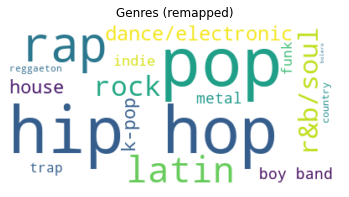

In [34]:
# wordcloud of genre remapped

global_songs_df = global_songs_df.drop(columns='genre').rename(columns={'genre_new':'genre'})

genre_rmp_count_df = global_songs_df.genre.value_counts().reset_index().rename(columns={'index':'genre', 'genre':'count'})
d = {genre: count for genre, count in genre_rmp_count_df.values}

gen_wordcloud(d, 'Genres (remapped)')

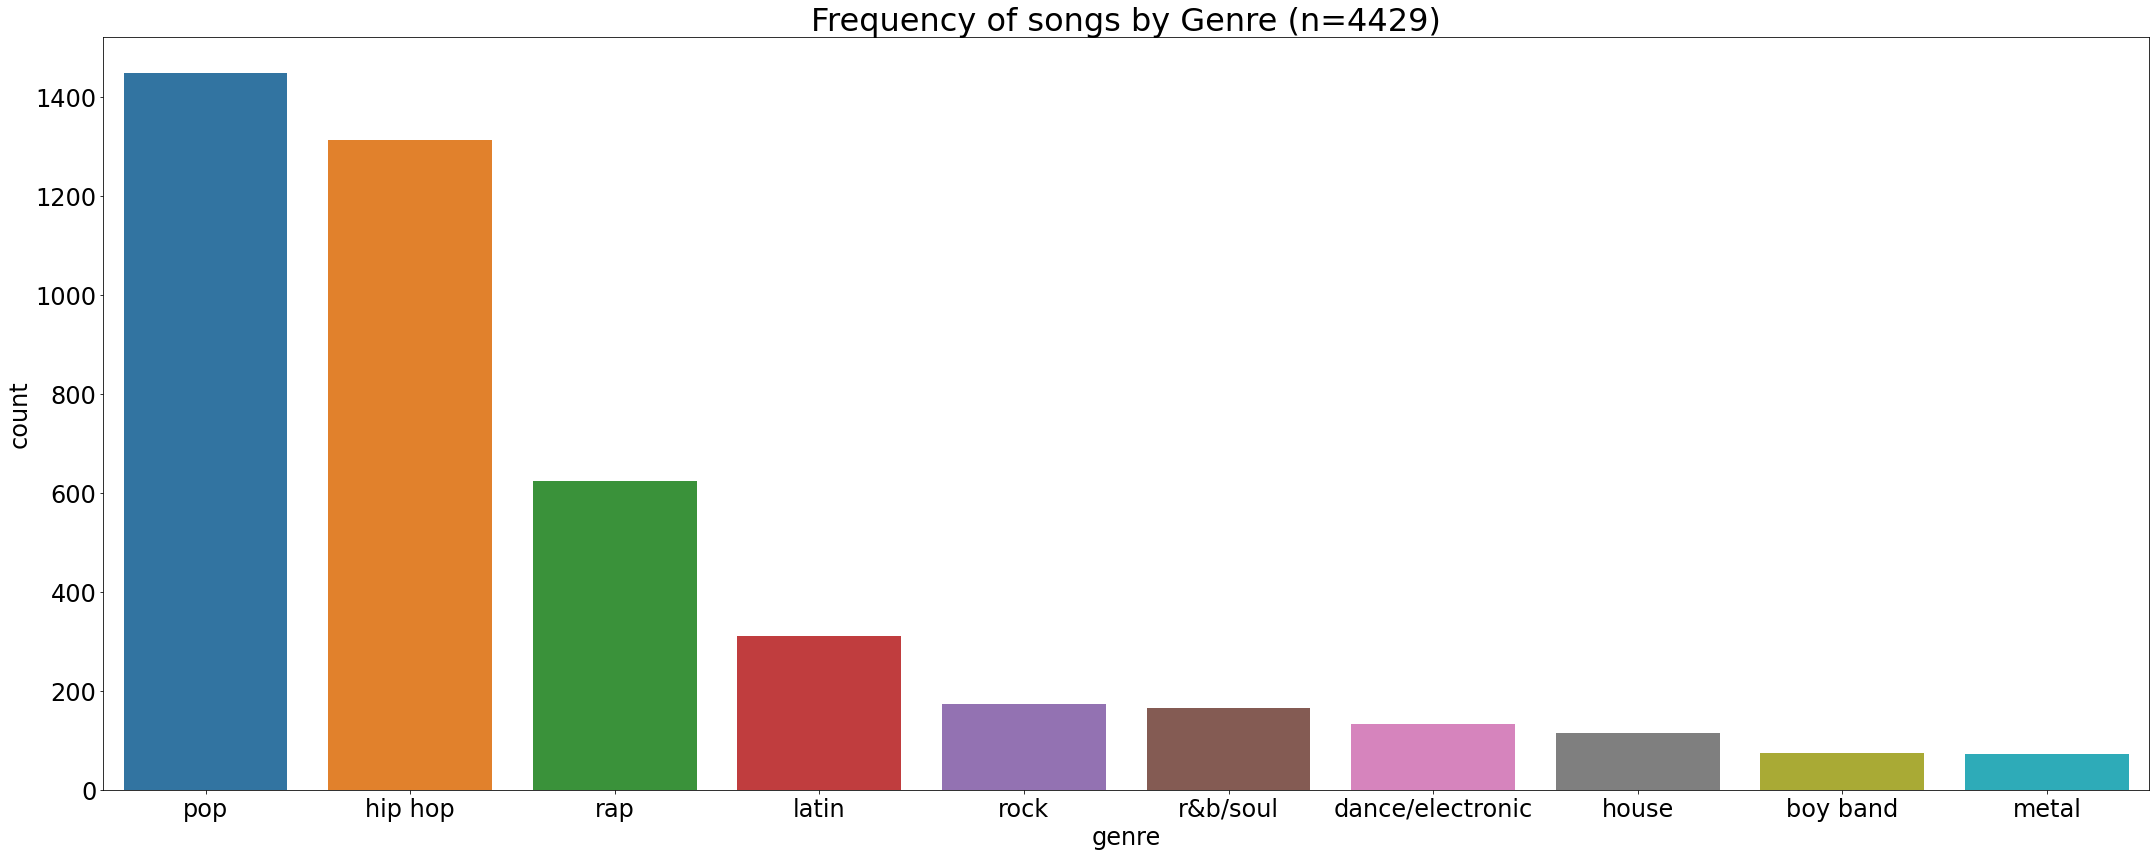

In [35]:
# get only top 10 non-foreign language genres
exclude_genres = ['mandopop', 'k-pop']
genre_rmp_count_df = genre_rmp_count_df[~genre_rmp_count_df['genre'].isin(exclude_genres)]
final_genre_count_df = genre_rmp_count_df.sort_values('count', ascending=False).head(10)

plt.figure(figsize=(30, 12))
plt.title(f"Frequency of songs by Genre (n={final_genre_count_df['count'].sum()})",
             fontsize=32)

plt.xlabel('genre', fontsize=24)
plt.ylabel('frequency', fontsize=24)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.tight_layout()

sns.barplot(x='genre', y='count', data=final_genre_count_df)
final_genre_count_df.to_csv('Data/vis/final_genre_counts.csv', index=False)

In [36]:
final_songs_df = global_songs_df[global_songs_df['genre'].isin(final_genre_count_df['genre'])]
final_songs_df.genre.value_counts()

pop                 1448
hip hop             1313
rap                  625
latin                311
rock                 173
r&b/soul             166
dance/electronic     132
house                114
boy band              74
metal                 73
Name: genre, dtype: int64

In [37]:
final_songs_df.describe()

popularity  artist_followers  explicit  danceability       energy  \
count    4429.000000      4.429000e+03    4429.0   4429.000000  4429.000000   
mean     3989.986803      1.135895e+07       0.0      0.684349     0.632366   
std     10957.980996      1.322467e+07       0.0      0.146635     0.168055   
min         0.800000      6.025000e+03       0.0      0.143000     0.013700   
25%        60.000000      2.633096e+06       0.0      0.597000     0.528000   
50%       350.700000      5.988544e+06       0.0      0.702000     0.647000   
75%      2448.400000      1.443968e+07       0.0      0.791000     0.756000   
max    221571.000000      7.178310e+07       0.0      0.974000     0.996000   

               key     loudness         mode  speechiness  acousticness  \
count  4429.000000  4429.000000  4429.000000  4429.000000   4429.000000   
mean      5.200497    -6.465777     0.570558     0.140055      0.219332   
std       3.686751     2.602023     0.495052     0.124937      0.238174   
min       0.000000   -34.475000     0.000000     0.023200      0.000002   
25%       1.000000    -7.605000     0.000000     0.047200      0.038800   
50%       5.000000    -6.093000     1.000000     0.085700      0.130000   
75%       8.000000    -4.792000     1.000000     0.205000      0.317000   
max      11.000000     0.175000     1.000000     0.954000      0.992000   

       instrumentalness     liveness      valence        tempo    duration_ms  \
count       4429.000000  4429.000000  4429.000000  4429.000000    4429.000000   
mean           0.012515     0.181827     0.474866   122.447375  206170.818018   
std            0.077058     0.140082     0.222054    29.772418   52883.892864   
min            0.000000     0.021500     0.026200    45.780000   30133.000000   
25%            0.000000     0.098100     0.303000    97.963000  176630.000000   
50%            0.000000     0.126000     0.470000   120.932000  201661.000000   
75%            0.000035     0.215000     0.644000   143.929000  229147.000000   
max            0.956000     0.962000     0.977000   216.334000  943529.000000   

       time_signature  days_since_release  top50_dummy  
count     4429.000000         4429.000000  4429.000000  
mean         3.962068         1270.939716     0.284714  
std          0.316523         2658.723317     0.451329  
min          1.000000           14.000000     0.000000  
25%          4.000000          386.000000     0.000000  
50%          4.000000          757.000000     0.000000  
75%          4.000000         1164.000000     1.000000  
max          5.000000        28798.000000     1.000000

In [38]:
# write to csv 
final_songs_df.to_csv('Data/spotify_global_1.csv', index=False, encoding='utf_8_sig')